In [1]:
# import Libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\shijo_dbe6qkx\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('./HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data_t = data[data.YearsAtCompany < 4]
data_t.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2


Text(0,0.5,'Employee Count')

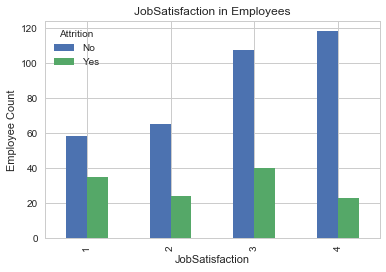

In [5]:
%matplotlib inline
pd.crosstab(data_t.JobSatisfaction,data_t.Attrition).plot(kind='bar')
plt.title('JobSatisfaction in Employees')
plt.xlabel('JobSatisfaction')
plt.ylabel('Employee Count')

Text(0,0.5,'Employee Count')

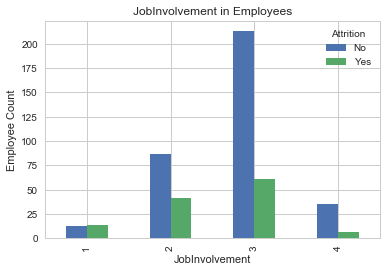

In [6]:
%matplotlib inline
pd.crosstab(data_t.JobInvolvement,data_t.Attrition).plot(kind='bar')
plt.title('JobInvolvement in Employees')
plt.xlabel('JobInvolvement')
plt.ylabel('Employee Count')

Text(0,0.5,'Employee Count')

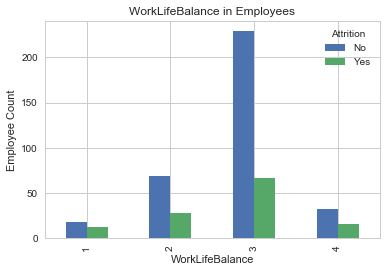

In [7]:
%matplotlib inline
pd.crosstab(data_t.WorkLifeBalance,data_t.Attrition).plot(kind='bar')
plt.title('WorkLifeBalance in Employees')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Employee Count')

Text(0,0.5,'Employee Count')

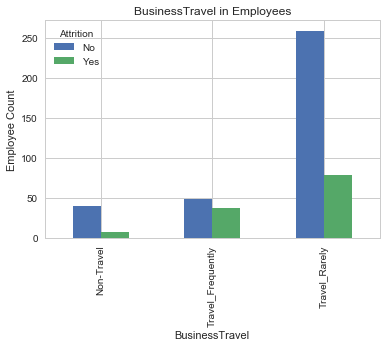

In [8]:
%matplotlib inline
pd.crosstab(data_t.BusinessTravel,data_t.Attrition).plot(kind='bar')
plt.title('BusinessTravel in Employees')
plt.xlabel('BusinessTravel')
plt.ylabel('Employee Count')

Text(0,0.5,'Employee Count')

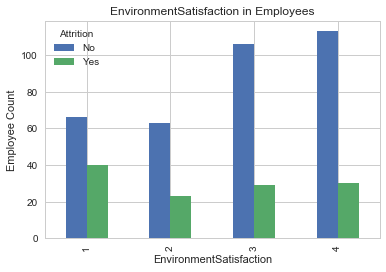

In [9]:
%matplotlib inline
pd.crosstab(data_t.EnvironmentSatisfaction,data_t.Attrition).plot(kind='bar')
plt.title('EnvironmentSatisfaction in Employees')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Employee Count')

Text(0,0.5,'Employee Count')

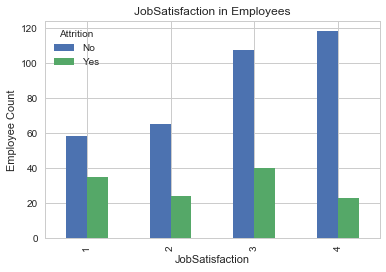

In [10]:
%matplotlib inline
pd.crosstab(data_t.JobSatisfaction,data_t.Attrition).plot(kind='bar')
plt.title('JobSatisfaction in Employees')
plt.xlabel('JobSatisfaction')
plt.ylabel('Employee Count')

In [11]:
data_t['Attrition_num'] = data_t.Attrition.map({'Yes':0, 'No':1})
data_t.head()

C:\Users\shijo_dbe6qkx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,1
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,1
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,1
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,80,1,3,2,3,2,2,1,2,1


In [12]:
cat_vars=['BusinessTravel']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data_t.join(cat_list)
    data_t=data1
cat_vars=['BusinessTravel']
data_vars=data_t.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [13]:
data_final=data_t[to_keep]
data_final.columns.values

array(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_num',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely'], dtype=object)

In [14]:
data_t = data_t[["Attrition_num", "JobInvolvement",  "WorkLifeBalance",  "BusinessTravel_Non-Travel", "BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely", "EnvironmentSatisfaction", "JobSatisfaction"]].copy()
data_t.head()
data_t.dtypes
data_t.groupby('Attrition_num').mean()

,JobInvolvement,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EnvironmentSatisfaction,JobSatisfaction
Attrition_num,,,,,,,
0,2.483607,2.704918,0.057377,0.303279,0.639344,2.401639,2.418033
1,2.775862,2.790230,0.114943,0.140805,0.744253,2.764368,2.818966


In [15]:
X = data_t.loc[:, data_t.columns != 'Attrition_num']
y = data_t.loc[:, data_t.columns == 'Attrition_num']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition_num'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Attrition_num']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Attrition_num']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Attrition_num']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Attrition_num']==1])/len(os_data_X))

length of oversampled data is  500
Number of no subscription in oversampled data 250
Number of subscription 250
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


C:\Users\shijo_dbe6qkx\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shijo_dbe6qkx\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.508934
         Iterations 6
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.111     
Dependent Variable:      Attrition_num         AIC:                   492.3979  
Date:                    2018-10-26 13:51      BIC:                   521.4671  
No. Observations:        470                   Log-Likelihood:        -239.20   
Df Model:                6                     LL-Null:               -269.13   
Df Residuals:            463                   LLR p-value:           4.8130e-11
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          6.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\shijo_dbe6qkx\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 2 41]
 [ 1 97]]


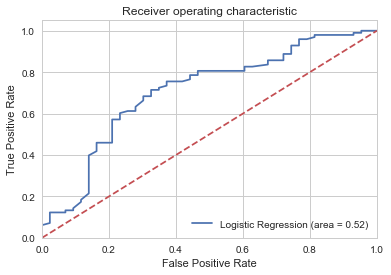

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()